### Pandas Ilustrado: La guía visual definitiva sobre los pandas

#### ¿Es una copia o una vista? ¿Debería fusionar o unir? ¿Y qué diablos es MultiIndex?

__Lev Maximov__

[https://betterprogramming.pub/pandas-illustrated-the-definitive-visual-guide-to-pandas-c31fa921a43]

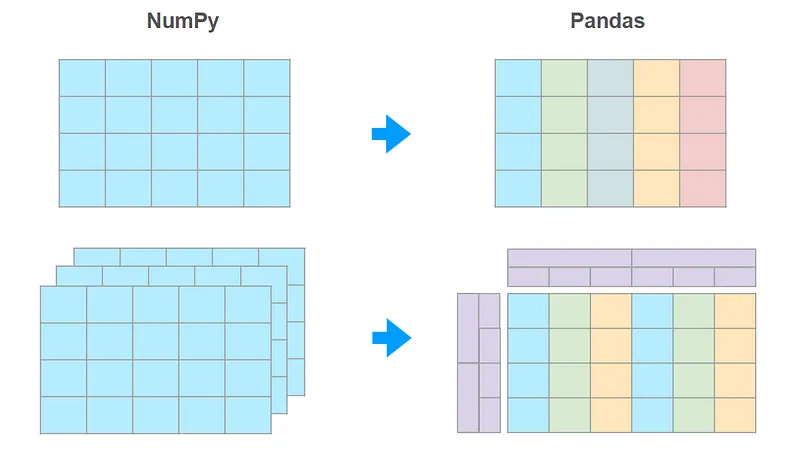

`Pandas` es un estándar de la industria para analizar datos en Python. Con unas pocas teclas, puede cargar, filtrar, reestructurar y visualizar gigabytes de información heterogénea. Construido sobre la biblioteca NumPy, toma prestados muchos de sus conceptos y convenciones de sintaxis, por lo que si se siente cómodo con NumPy, encontrará que Pandas es una herramienta bastante familiar. E incluso si nunca has oído hablar de NumPy, Pandas proporciona una gran oportunidad para tomar medidas enérgicas contra los problemas de análisis de datos con poca o ninguna experiencia en programación.

Hay muchas guías de Pandas por ahí. En este en particular, se espera que tengas un
conocimiento básico de NumPy. Si no lo haces, te sugiero que leas el NumPy ilustrado
guía para tener una idea de qué es una matriz NumPy, en qué formas es superior a una
lista de Python y cómo ayuda a evitar bucles en operaciones elementales.

Dos características clave que Pandas aporta a las matrices NumPy son:
1. Tipos heterogéneos: cada columna puede tener su propio tipo;
2. Índice: mejora la velocidad de búsqueda de las columnas especificadas.

Resulta que estas características son suficientes para hacer de Pandas un poderoso competidor tanto para las hojas de cálculo como para las bases de datos.
Polars, la reciente reencarnación de Pandas (escrita en Rust, por lo tantomás rápido ¹) ya no usa NumPy internamente, sin embargo, la sintaxis es bastante similar, por lo que aprender Pandas también te permitirá sentirte cómodo con Polars.

El artículo consta de cuatro partes:
- Parte 1. Motivación
- Parte 2. Serie e índice Parte

3. Marcos de datos
- Parte 4. Índice múltiple

… y es bastante extenso, aunque fácil de leer ya que se compone principalmente de imágenes.

Para una lectura de 1 minuto de los “primeros pasos” en Pandas, puedo recomendar un excelente
Introducción visual a los pandas ² de Jay Alammar.
[https://jalammar.github.io/gentle-visual-intro-to-data-analysis-python-pandas/]



#### Discusiones

- Noticias de piratas informáticos (263 puntos, 41 comentarios)
[https://news.ycombinator.com/item?id=34550735]
- Reddit r/Python (290 puntos, 29 comentarios)
[https://www.reddit.com/r/Python/comments/10mezt9/pandas_illustrated_the_definitive_visual_guide_to/?rdt=36798]

#### Contenido

1. __Motivación y escaparate__
    - Escaparate de pandas
    - Velocidad de los pandas
2. __Índice de series e índices__
    - Encontrar elemento por valor
    - Valores faltantes    
    - Comparaciones
    - Agrega, inserta, elimina
    - estadísticas
    - Datos duplicados
    - Cadenas y expresiones regulares
    - Agrupar por
3. __Marcos de datos__
    - Lectura y escritura de archivos CSV
    - Creación de un marco de datos
    - Operaciones básicas con DataFrames
    - Indexación de DataFrames
    - Aritmética del marco de datos
    - Combinando marcos de datos:
        - Apilamiento vertical
        - Apilado horizontal
        - Apilamiento mediante MultiIndex
    - Unirse a marcos de datos:
        - Se une una relación 1:1
        - Se une una relación 1:n
        - Múltiples uniones
    - Inserta y elimina
    - Agrupar por
    - Pivotar y 'despivotar'
4. __Índice múltiple__
    - Agrupación aparente
    - Conversiones de tipos
    - Construyendo DataFrame con Indexación
    - MultiIndex con MultiIndex
    - Apilar y desapilar
    - Cómo evitar que apilar/desapilar se clasifique
    - Manipulación de niveles
    - Convertir MultiIndex en un índice plano y restaurarlo nuevamente
    - Ordenando MultiIndex
    - Lectura y escritura de marcos de datos multiindexados en disco
    - aritmética multiíndice

#### Parte 1. Motivación y escaparate

Supongamos que tiene un archivo con un millón de líneas de valores separados por comas como este:

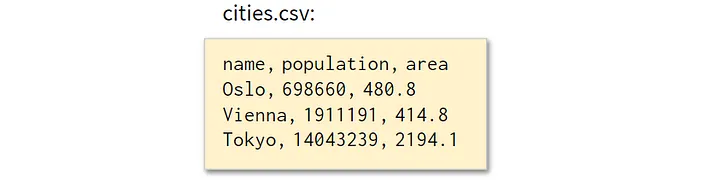

__Los espacios después de los dos puntos tienen únicamente fines ilustrativos. Generalmente no hay ninguno.__

Y necesitas dar respuestas a preguntas básicas como "¿Qué ciudades tienen un área de más de 450 km² y una población de menos de 10 millones" con NumPy.

La solución de fuerza bruta de introducir toda la tabla en una matriz NumPy no es una buena opción:
normalmente, las matrices NumPy son homogéneas (= todos los valores tienen el mismo tipo), por lo que todos los campos se interpretarán como cadenas y las comparaciones no funcionarán. como se esperaba.

Sí, NumPy tiene matrices estructuradas y de registros[https://betterprogramming.pub/a-comprehensive-guide-to-numpy-data-types-8f62cb57ea83#e16e] que permiten columnas de diferentes tipos, pero están destinadas principalmente a interactuar con código C. Cuando se utilizan para fines generales, tienen las siguientes desventajas:

- no es realmente intuitivo (por ejemplo, te enfrentarás a constantes como <f8 y <U8 en todos lados);

- tiene algunos problemas de rendimiento en comparación con los arreglos NumPy normales;

- almacenados de forma contigua en la memoria, por lo que cada adición o eliminación de columnas requiere la reasignación de toda la matriz;

- Todavía faltan muchas funciones de Pandas DataFrames.

Su próximo intento probablemente sea almacenar cada columna como un vector NumPy
independiente. Y después de eso, tal vez envolverlos en un `dict` por lo que puede ser más fácil
restaurar la integridad de la 'base de datos' si decide agregar o eliminar una o dos filas más
adelante. Así es como se vería:

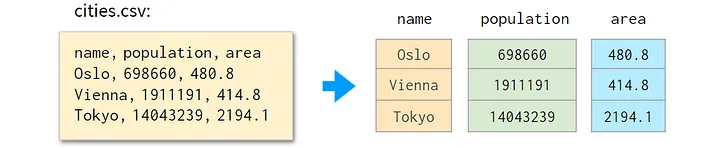

Si lo has hecho, ¡felicidades! Ha dado el primer paso para
reimplementar Pandas. :)

__1.1 Escaparate de pandas__

Considere la siguiente tabla:    

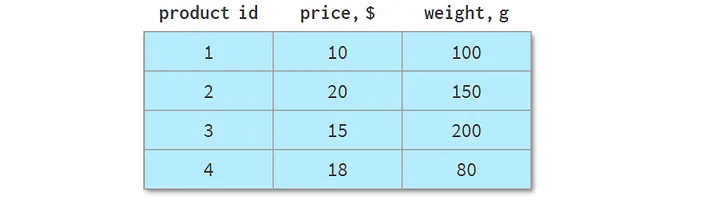

Describe la diversa línea de productos de una tienda online con un total de cuatro productos
distintos. A diferencia del ejemplo anterior, se puede representar igualmente bien con una
matriz NumPy o con un Pandas DataFrame. Pero veamos algunas operaciones comunes con
él.

__1.Clasificación__

Ordenar por columna es más legible con Pandas, como puede ver a continuación:

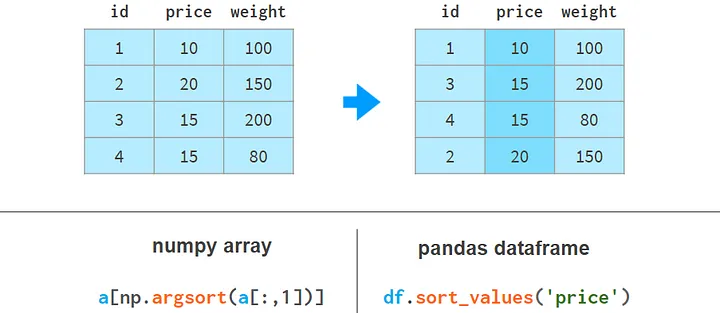

Aquíordenación `arg(a[:,1])` calcula la permutación que forma la segunda columna de
`a`ordenarse en orden ascendente y luego el exterior `a[…]` reordena las filas de `a`, respectivamente. Los pandas pueden hacerlo en un solo paso.

__2.Ordenar por varias columnas__

Si necesitamos ordenar por columna de precio rompiendo empates usando la columna de peso, la
situación empeora para NumPy:

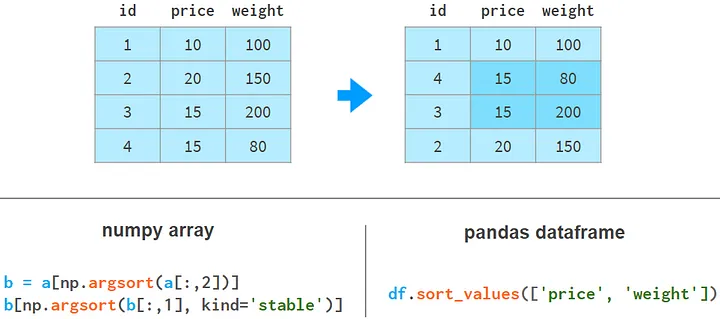

Con NumPy, primero ordenamos por peso y luego aplicamos el segundo pedido por precio. Un
algoritmo de clasificación estable garantiza que el resultado de la primera clasificación no se pierda
durante la segunda. Hay otras maneras[https://betterprogramming.pub/numpy-illustrated-the-visual-guide-to-numpy-3b1d4976de1d#b97e] de hacerlo con NumPy, pero ninguno es tan simple y elegante como con Pandas.

__3.Agregar una columna__

Agregar columnas es mucho mejor con Pandas, sintáctica y arquitectónicamente:

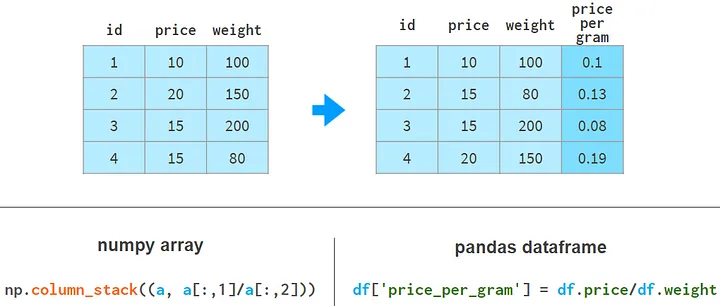

Pandas no necesita reasignar memoria para toda la matriz como NumPy; simplemente agrega una
referencia a una nueva columna y actualiza un "registro" de los nombres de las columnas.

__4.Búsqueda rápida de elementos__

Con las matrices NumPy, incluso si el elemento que busca es el primero, necesitará un tiempo
proporcional al tamaño de la matriz para encontrarlo. Con Pandas, puede indexar las columnas que
espera que se consulten con más frecuencia y reducir el tiempo de búsqueda a una constante.

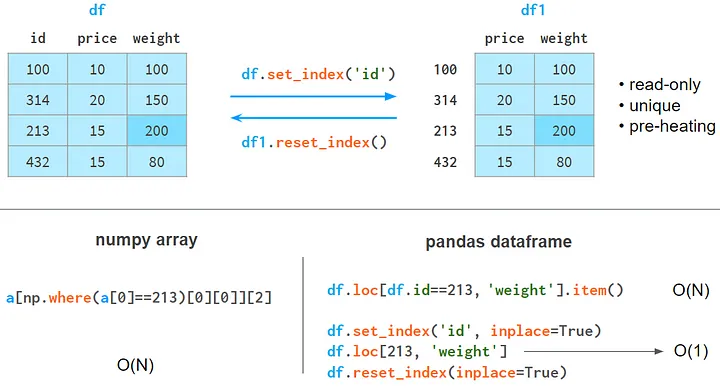

La columna de índice tiene las siguientes limitaciones:

- Requiere memoria y tiempo para construirse.
- Es de solo lectura (debe reconstruirse después de cada operación de agregar o eliminar).
- No es necesario que los valores sean únicos, pero la aceleración solo ocurre cuando los elementos son únicos.
- Requiere calentamiento: la primera consulta es algo más lenta que en NumPy, pero las siguientes son significativamente más rápidas.

__5. Uniones por columna__

Si desea complementar una tabla con información de otra tabla basada en una columna
común, NumPy no es de mucha ayuda. Pandas es mejor, especialmente para relaciones
1:n.

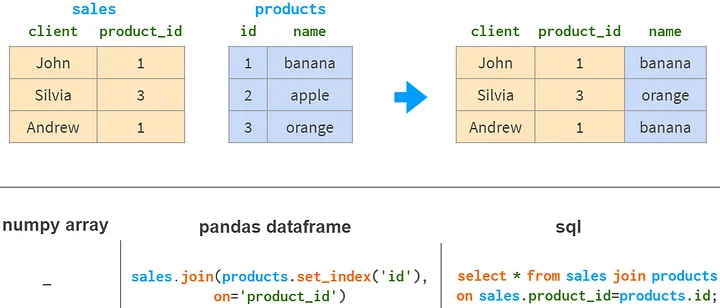

pandas `join` tiene todos los modos de unión familiares `"inner"`, `"left"`, `"right"` y `"full outer"`.

__6. Agrupación por columna__

Otra operación común en el análisis de datos es agrupar por columna(s). Por ejemplo, para obtener la cantidad total de cada producto vendido, puedes hacer lo siguiente:

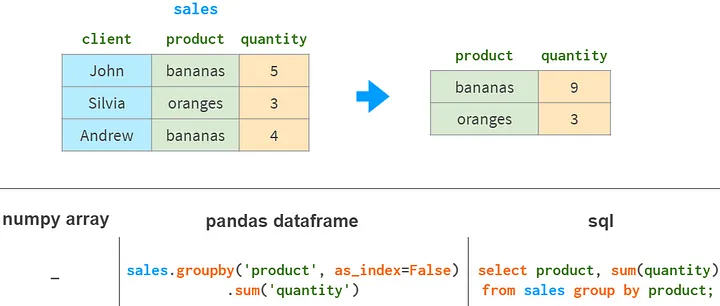

Además de `sum`, Pandas admite todo tipo de funciones agregadas: `mean`,
`max`, `min`, `count`, etc.

__7. Tablas dinámicas__

Una de las características más poderosas de Pandas es una tabla "pivote". Es algo así como
proyectar un espacio multidimensional en un plano bidimensional.

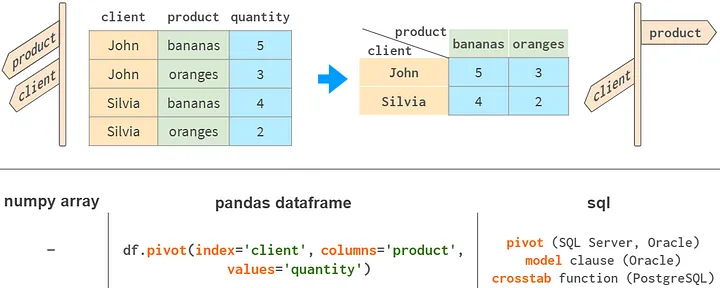

Aunque ciertamente es posible implementarlo con NumPy, esta funcionalidad falta "lista para usar", aunque está presente en todos los principales bases de datos relacionales³[] y aplicaciones de hojas de cálculo (Sobresalir ,Hojas de cálculo de Google[https://support.microsoft.com/en-us/office/create-a-pivottable-to-analyze-worksheet-data-a9a84538-bfe9-40a9-a8e9-f99134456576]).
Los pandas también tienendf `.pivot_table` que combina agrupación y pivotación en una sola herramienta.

En este punto, quizás te preguntes por qué alguien usaría NumPy si Pandas es tan bueno.
NumPy no es mejor ni peor, solo tiene diferentes casos de uso:

- Números aleatorios (p. ej., para pruebas)
- Álgebra lineal (p. ej., para redes neuronales)
- Imágenes y pilas de imágenes (por ejemplo, para CNN)
- Diferenciación, integración, trigonometría y demás personal científico.

En pocas palabras, las dos diferencias principales entre NumPy y Pandas son las
siguientes:

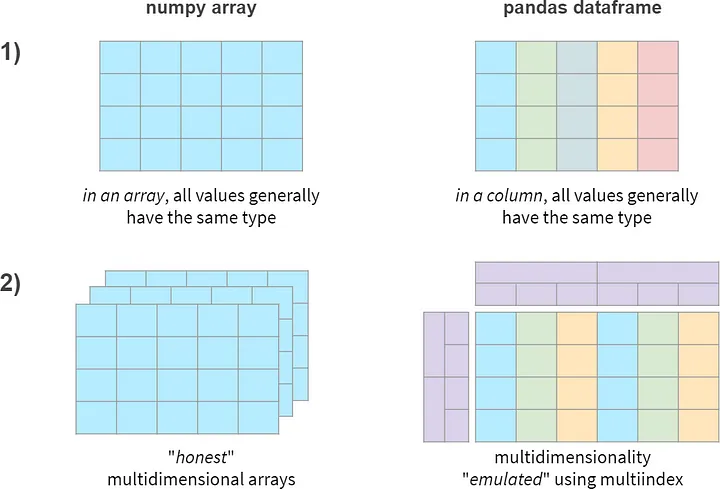

__1.2 Velocidad de los pandas__

He comparado NumPy y Pandas en una carga de trabajo típica de Pandas: 5 a 100 columnas; 10³–
10⁸ filas; números enteros y flotantes. Estos son los resultados para 1 fila y 100 millones de filas:    

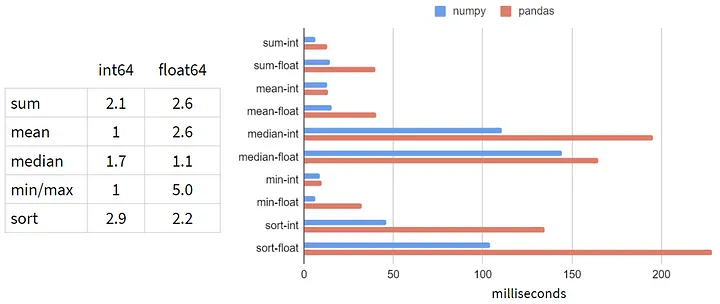

¡Parece como si en cada operación, Pandas fuera más lento que NumPy!

La situación (como era de esperar) no cambia cuando aumenta el número de columnas.
En cuanto al número de filas, la dependencia (en escala logarítmica) se ve así:

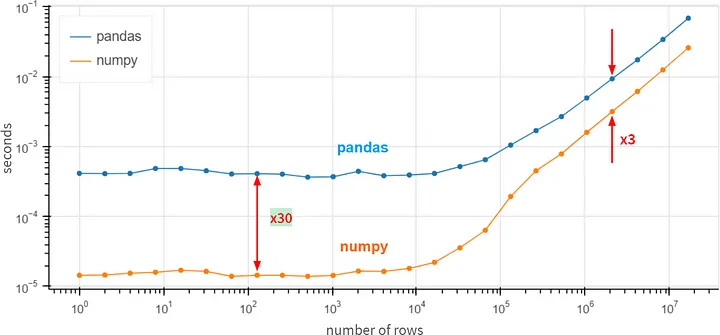

Pandas parece ser 30 veces más lento que NumPy para matrices pequeñas (menos de cien filas) y
tres veces más lento para matrices grandes (más de un millón de filas).

¿Cómo puede ser? Quizás ya es hora de enviar una solicitud de función para sugerir Pandas
reimplementar `df.column.sum()` a través de `df.column.values.sum()`? La propiedad `values` aquí proporciona acceso a la matriz NumPy subyacente y da como resultado una aceleración de 3x-30x.

La respuesta es no. Pandas es muy lento en esas operaciones básicas porque maneja
correctamente los valores faltantes. Pandas necesita NaN (no un número) para todo esta
Maquinaria similar a una base de datos, como agrupar y pivotar, además es algo común en el
mundo real. En Pandas, se ha trabajado mucho para unificar el uso de NaN en todos los tipos
de datos admitidos. Por definición (aplicada en el nivel de CPU),
`nan` +cualquier cosa resulta en `nan`. Entonces:

In [18]:
import numpy as np

np.sum([1, np.nan, 2])

np.float64(nan)

pero

In [19]:
import pandas as pd

pd.Series([1, np.nan, 2]).sum()

np.float64(3.0)

Una comparación justa sería utilizar `np.nansum` en lugar de `np.sum`, `np.nanmean` en lugar
de `np.mean` y etcétera. Y de repente…

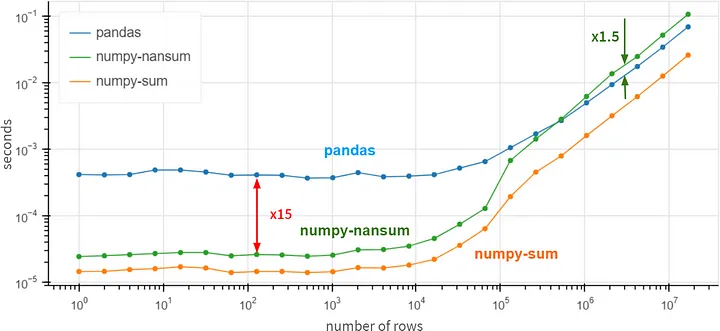

Pandas se vuelve 1,5 veces más rápido que NumPy para matrices con más de un millón de elementos.
Sigue siendo 15 veces más lento que NumPy para matrices más pequeñas, pero normalmente no
importa mucho si la operación se completa en 0,5 ms o 0,05 ms; de todos modos, es rápido.

La conclusión es que si está 100% seguro de que no le faltan valores en sus columnas, tiene sentido usar `df.column.values.sum()` en lugar de `df.column.sum()` para tener un aumento de rendimiento x3-x30. En presencia de valores faltantes, la velocidad de Pandas es bastante decente e incluso supera a NumPy en matrices grandes (más de 10⁶ elementos).

#### Parte 2. Serie e índice

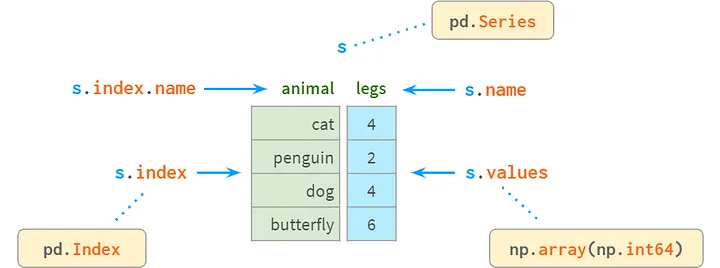

La serie es una contraparte de una matriz 1D en NumPy y es un bloque de construcción básico
para un DataFrame que representa su columna. Aunque su importancia práctica está
disminuyendo en comparación con un DataFrame (puedes resolver perfectamente muchos
problemas prácticos sin saber qué es una Serie), es posible que te resulte difícil entender
cómo funcionan los DataFrames sin aprender primero la Serie y el Índice.

Internamente, `Series` almacena los valores en un antiguo vector NumPy. Como tal, hereda sus ventajas (diseño de memoria compacto, acceso aleatorio rápido) y deméritos (homogeneidad de tipos, eliminaciones e inserciones lentas). Además de eso, Series permite acceder a sus valores mediante etiqueta usando una estructura tipo dict llamada índice. Las etiquetas pueden ser de cualquier tipo (normalmente cadenas y marcas de tiempo). No es necesario que sean únicos, pero se requiere la unicidad para aumentar la velocidad de búsqueda y se supone en muchas operaciones.

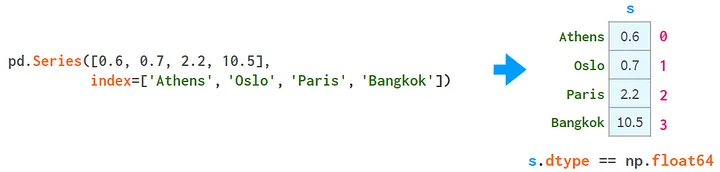

Como puede ver, ahora cada elemento se puede abordar de dos formas alternativas: mediante
'etiqueta' (=usando el índice) y mediante 'posición' (=sin usar el índice):

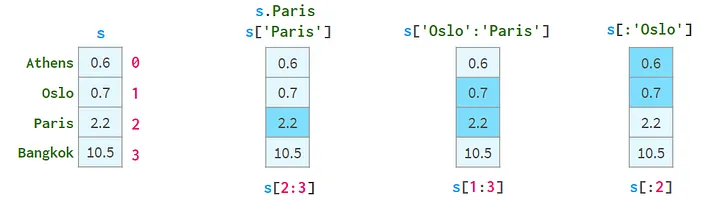

A la dirección "por posición" a veces se le llama "por índice posicional", lo que no hace más que aumentar la confusión.

Obviamente, un par de corchetes no es suficiente para esto. En particular:
- `s[2:3]` no es la forma más conveniente de abordar el elemento número 2
- si las etiquetas resultan ser números enteros, `s[1:3]` se vuelve ambiguo. Podría significar etiquetas 1 a 3 inclusive o índices posicionales 1 a 3 exclusivos.

Para abordar esos problemas, Pandas tiene dos 'sabores' más de corchetes:

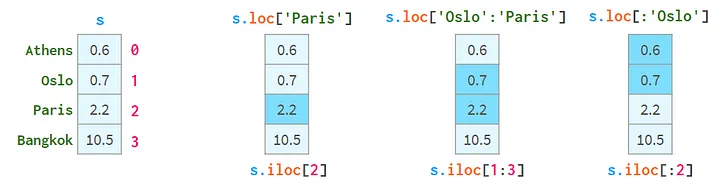

- `.loc[]` siempre usa etiquetas e incluye ambos extremos del intervalo;
- `.iloc[]` siempre utiliza índices posicionales y excluye el extremo derecho.

El propósito de usar corchetes en lugar de paréntesis aquí es obtener acceso al conveniente
corte de Python: Puede usar dos puntos simples o dobles con el significado familiar de
`start:stop:step`. Como es habitual, faltar el inicio (end) significa desde el inicio (hasta el final) de la Serie. El argumento de paso permite hacer referencia a filas pares con
`s.iloc[::2]` y obtener elementos en orden inverso con `s['París':'Oslo':-1]`

También admiten la indexación booleana (indexación con una serie de valores booleanos), como muestra esta imagen:

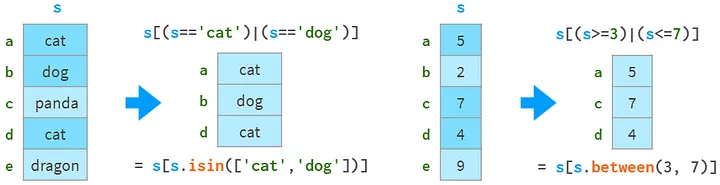

Y puedes ver cómo admiten la `'indexación sofisticada'` (indexación con una serie de números
enteros) en esta imagen:

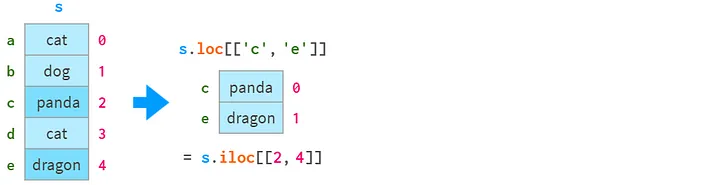

Lo peor de Series es su representación visual: por alguna razón, no recibió una buena perspectiva de texto enriquecido, por lo que se siente como un ciudadano de segunda clase en comparación con un DataFrame:

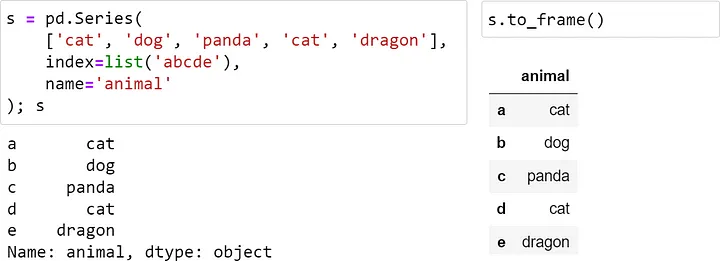

He parcheado la serie para que se vea mejor, como se muestra a continuación:

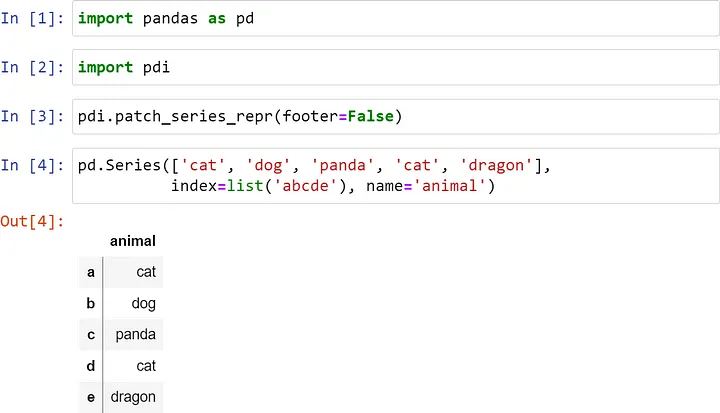

La línea vertical significa que se trata de una serie, no de un DataFrame. El pie de página está deshabilitado aquí, pero puede ser útil para mostrar tipos de letra, especialmente con categorías.

También puede mostrar varias Series o DataFrames uno al lado del otro
`pdi.sidebyside(obj1, obj2, …)`:

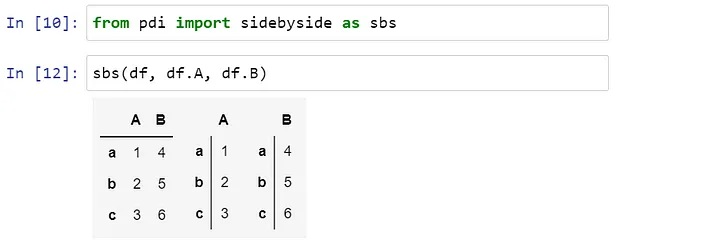

El `pdi`(Significa pandas ilustrado) es una biblioteca de código abierto en github con esta y
otras funciones para este artículo. Para usarlo, escribe 

`pip install pandas-illustrated`

__Índice__

El objeto responsable de obtener los elementos de la serie (así como las filas y columnas del DataFrame)
por etiqueta se llama índice. Es rápido: puedes obtener el resultado en un tiempo constante, ya sea que
tengas cinco elementos o 5 mil millones de elementos.

`Index` es una criatura verdaderamente polimórfica. De forma predeterminada, cuando crea una serie (o un DataFrame) sin `index` argumento, se inicializa en un objeto perezoso similar al de Python `range()`. Al igual que `range()`, apenas utiliza memoria y proporciona las etiquetas coincidiendo con la indexación posicional. Creemos una Serie de un millón de elementos:

In [20]:
s = pd.Series(np.zeros(10**6))
s.index
#RangeIndex(start=0, stop=1000000, step=1)

RangeIndex(start=0, stop=1000000, step=1)

In [21]:

s.index.memory_usage() # in bytes
#128 # the same as for Series([0.])

132

Ahora, si eliminamos un elemento, el índice se transforma implícitamente en una estructura tipo dict, de la siguiente manera:

In [22]:
s1 = s.drop(1)
s1.index
# Int64Index([...0,2,3,4,5,6,7,
# 999993, 999994, 999995, 999996, 999997, 999998, 999999],
# dtype='int64', length=999999)

Index([     0,      2,      3,      4,      5,      6,      7,      8,      9,
           10,
       ...
       999990, 999991, 999992, 999993, 999994, 999995, 999996, 999997, 999998,
       999999],
      dtype='int64', length=999999)

In [23]:
s1.index.memory_usage()
# 7999992

7999992

¡Esta estructura consume 8Mb de memoria! Para deshacerse de él y volver a la
estructura liviana similar a un rango, escriba

In [24]:
s2 = s1.reset_index(drop=True)
s2.index
# RangeIndex(start=0, stop=999999, step=1)

RangeIndex(start=0, stop=999999, step=1)

In [25]:
s2.index.memory_usage()
# 128

132

Si eres nuevo en Pandas, quizás te preguntes por qué Pandas no lo hizo solo. Bueno, para las
etiquetas no numéricas, es bastante obvio: ¿por qué (y cómo) Pandas, después de eliminar una fila, volvería a etiquetar todas las filas siguientes? Para las etiquetas numéricas, la respuesta es un poco más complicada.

Primero, como ya hemos visto, Pandas le permite hacer referencia a filas únicamente por posición, por lo que si desea abordar la fila número 5 después de eliminar la fila número 3, puede hacerlo sin volver a indexar (eso es lo que `iloc` es para).

En segundo lugar, mantener las etiquetas originales es una forma de mantener una conexión con
un momento del pasado, como un botón de "guardar partida". Imagine que tiene una tabla
grande con cien columnas y un millón de filas y necesita encontrar algunos datos. Está realizando varias consultas una por una, cada vez limitando su búsqueda, pero mirando solo un subconjunto de las columnas, porque no es práctico ver los cien campos al mismo tiempo. Ahora que ha encontrado las filas de interés, desea ver toda la información de la tabla original sobre ellas. Un índice numérico le ayuda a obtenerlo inmediatamente sin ningún esfuerzo adicional.
Esquemáticamente, se ve así:

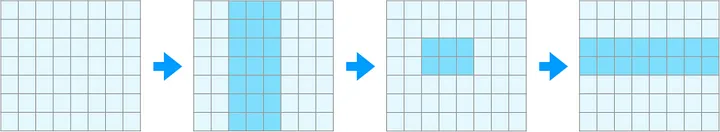

Generalmente, mantener los valores del índice únicos es una buena idea. Por ejemplo, no obtendrá un aumento en la velocidad de búsqueda en presencia de valores duplicados en el índice. Pandas no tiene una "restricción única" como las bases de datos relacionales (la característica todavía es experimental), pero tiene funciones para verificar si los valores en el índice son únicos y deshacerse de duplicados de varias maneras.

A veces, una sola columna no es suficiente para identificar de forma única la fila. Por ejemplo, a veces se encuentran ciudades con el mismo nombre en diferentes países o incluso en diferentes regiones del mismo país. Entonces(`Ciudad, Estado`) es un mejor candidato para identificar un lugar sólo como `Ciudad`. En las bases de datos, se denomina "clave primaria compuesta". En Pandas, se llama `MultiIndex` (consulte la Parte 4 a continuación) y cada columna dentro del índice se llama "nivel".

Otra cualidad sustancial de un índice es que es `inmutable`. A diferencia de las columnas normales del DataFrame, no puede modificarlo in situ. Cualquier cambio en el índice implica obtener datos del índice anterior, modificarlos y volver a adjuntar los datos nuevos como un índice nuevo. Por ejemplo, para convertir nombres de columnas en cadenas in situ (ahorra memoria), escriba `df.columns = df.columns.astype(string)` o no en el lugar (útil para
métodos de encadenamiento) `df.set_axis(df.columns.astype(string), axis=1)`. Más a menudo que no, esto sucede de forma transparente (por ejemplo, al agregar o eliminar una columna), pero es la inmutabilidad la que no le permite simplemente escribir `df.Ciudad.name = 'ciudad'`, así que tiene que recurrir a un menos obvio `df.rename(columns={'Ciudad': 'ciudad'})`.

El índice tiene un nombre (en el caso de MultiIndex, cada nivel tiene un nombre).
Desafortunadamente, este nombre está infrautilizado en Pandas. Una vez que haya
incluido la columna en el índice, no podrá utilizar la conveniente notación `df.name_column` y
tener que volver a la menos legible `df.index` o el más universal `df.loc[]`. La situación empeora con MultiIndex. Una excepción destacada es `df.merge` — puede especificar la columna a
fusionar por nombre, sin importar si esta columna pertenece al índice o no.
Las columnas están etiquetadas usando el mismo índice que las filas, aunque puede que no
sea evidente a partir de los argumentos del `pd.DataFrame` constructor.

__2.1 Encontrar elemento por valor__
    
Considere el siguiente objeto Series:

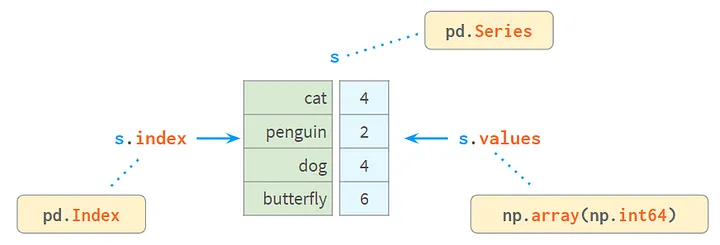

Index proporciona una manera rápida y conveniente de encontrar un valor por etiqueta. Pero ¿qué tal encontrar una etiqueta por valor?

In [27]:
# Crear la serie de pandas
valores = [4, 2, 4, 6]
indices = ['cat', 'penguin', 'dog', 'butterfly']
s = pd.Series(valores, index=indices)

# Mostrar la serie
print(s)


cat          4
penguin      2
dog          4
butterfly    6
dtype: int64


s.index[s.tolist().find(x)]             # faster for len(s) < 1000
s.index[np.where(s.values==x)[0][0]]    # faster for len(s) > 1000

In [35]:
!pip install pdi

ERROR: Could not find a version that satisfies the requirement pdi (from versions: none)
ERROR: No matching distribution found for pdi


In [33]:
import pdi
pdi.find(s, 2)
# 'penguin'

ModuleNotFoundError: No module named 'pdi'

In [30]:
pdi.findall(s, 4)
# Index(['cat', 'dog'], dtype='object')

NameError: name 'pdi' is not defined

2.2 Valores faltantes

Los desarrolladores de Pandas tuvieron especial cuidado con los valores faltantes. Por lo general, recibe un marco de datos con NaN al proporcionar una bandera para `read_csv`. De lo contrario, puedes usar `None` en el constructor o en un operador de asignación (funcionará a pesar de estar implementado de manera ligeramente diferente para diferentes tipos de datos), por ejemplo:

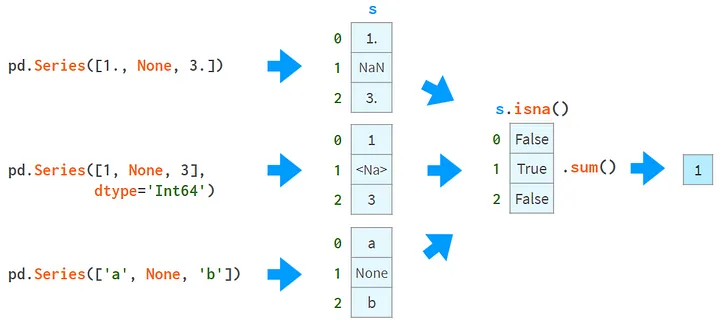

Lo primero que puede hacer con los NaN es comprender si tiene alguno. Como se ve en la
imagen de arriba,`isna()` produce una matriz booleana, y `sum()` da el número total de valores
faltantes.
Ahora que sabe que están allí, puede optar por deshacerse de ellos eliminándolos, llenándolos
con un valor constante o interpolándolos, como se muestra a continuación:

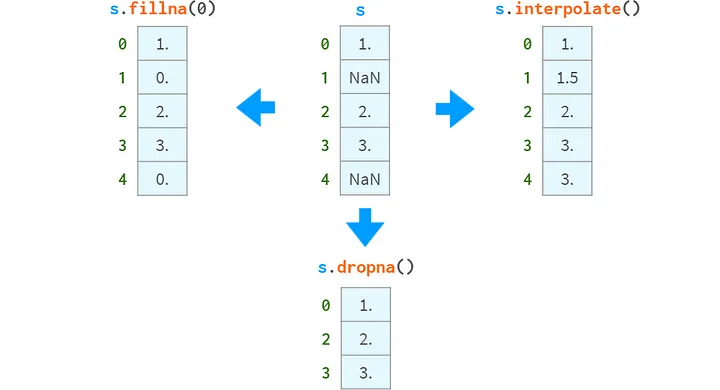

__fillna(), dropna(), interpolate()__

Por otro lado, puedes seguir usándolos. La mayoría de las funciones de Pandas ignoran felizmente los valores faltantes:

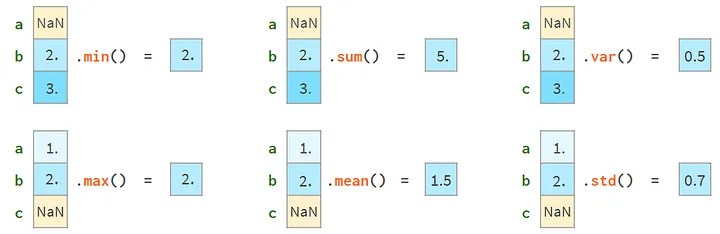

Funciones más avanzadas (`median,rank,quantile`, etc.) también lo hacen.
Las operaciones aritméticas están alineadas contra el `index`:

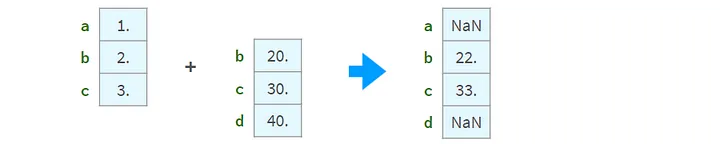

Los resultados son inconsistentes en presencia de valores `no-únicos` en el índice. No
utilice operaciones aritméticas en series con un índice no único.

__2.3 Comparaciones__

Comparar matrices con valores faltantes es complicado.

Para empezar,
- `None` siempre es igual a `None`,
- Nan(`np.nan` aka `math.nan` aka `float('nan')`) nunca es igual `Nan`, y, si todavía no te resulta lo suficientemente extraño,
- comparando `pd.NA` a cualquier cosa siempre vuelve `pd.NA`:

In [ ]:
None == None
# output = True

np.nan == np.nan
# output = False

pd.NA == pd.NA
# output = <NA>

Cuando se trata de matrices, la cosa empeora:

In [ ]:
np.all( # np.all(...): Verifica si todos los elementos 
        # en el resultado de la comparación son True
    pd.Series([1., None, 3.]) 
    ==
    pd.Series([1., None, 3.])
    )
# this is np.nan
# output = False

np.all(pd.Series(['a', None, 'c']) ==
pd.Series(['a', None, 'c']))
# this is None
# output = False

np.all(pd.Series([1, None, 3], dtype='Int64') ==
pd.Series([1, None, 3], dtype='Int64'))
# this is pd.NA
# output = True

Un método sencillo para compararlos adecuadamente es reemplazar todos estos
sabores de `pd.NA`(significa "no disponible") con algo que se garantiza que faltará en la
matriz. Por ejemplo, con `'', -1 o ∞`:

In [ ]:
np.all(s1.fillna(np.inf) == s2.fillna(np.inf))
# output = True

Una mejor manera es usar una función de comparación estandar Numpy o Pandas:

In [ ]:
s = pd.Series([1., None, 3.])
# np.allclose es una función de NumPy que compara 
# dos arrays para ver si son element-wise iguales dentro de una tolerancia.
np.allclose(s.values, s.values, equal_nan=True) # equal_nan=True indica que los NaN en los 
                                                # dos arrays deberían ser considerados iguales.
# output = True

len(s.compare(s)) == 0 # len(s.compare(s)) da el número de diferencias encontradas.
# output = True

pd.testing.assert_series_equal(s, s) # pd.testing.assert_series_equal es una función 
                                     # de pandas que verifica que dos Series son iguales.
# returns None

Aquí,`compare`[https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.compare.html] devuelve una lista de diferencias (un DataFrame, en realidad), `allclose`[https://numpy.org/doc/stable/reference/generated/numpy.allclose.html] y
`array_equal`[https://numpy.org/doc/stable/reference/generated/numpy.array_equal.html] devuelve un booleano directamente, y `assert_series_equal`[https://pandas.pydata.org/docs/reference/api/pandas.testing.assert_series_equal.html] genera una excepción
detallada cuando se encuentran diferencias.
Al comparar DataFrames con tipos que no son "nativos" de NumPy (p. ej. `object`,
`'Int64'`, tipos mixtos, etc.), la comparación NumPy falla (issue#19205 [https://github.com/numpy/numpy/issues/19205] ), mientras que
Pandas funciona perfectamente. Así es como se ve:

In [ ]:
df = pd.DataFrame({'a': [1., None, 3.], 'b': ['x', None, 'z']})
np.allclose(df.values, df.values, equal_nan=True)
# output = TypeError
# <...>

len(df.compare(df)) == 0
# output = True

pd.testing.assert_frame_equal(df, df)
# returns None

Una agradable ventaja de usar la función `assert_anything_equal` es su capacidad para comparar
floats correctamente (con tolerancias absolutas y relativas personalizables), al igual que
`np.allclose` — de modo que dentro de las matrices `0.1 + 0.2` parezca ser igual a `0.3`:

In [ ]:
0.1+0.2 == 0.3
# output = False

assert_series_equal(pd.Series([0.1+0.2]), pd.Series([0.3])) # no exception

Tenga en cuenta que todos los métodos descritos anteriormente requieren que la forma (NumPy) o tanto la forma como el índice (Pandas) sean idénticos. De lo contrario los operadores de comparación y `compare` llegarían tan lejos como para lanzar un `ValueError` mientras
`np.array_equal` devuelve `False` y `assert_anything_equal` lanza un `AssertionError` como de costumbre. La única excepción es `np.allclose` que transmite las matrices antes
de la comparación:

In [ ]:
np.array_equal(np.array([1, 1, 1]), np.array[1])
# output = False

np.allclose(np.array([1, 1, 1]), np.array[1])
# output = True

np.testing.assert_array_equal(np.array([1, 1, 1]), np.array[1])
# output = AssertionError

__2.4 Agrega, inserta, elimina__

Aunque se supone que los objetos de la Serie son de tamaño inmutable, es posible agregar, insertar y eliminar elementos en el lugar, pero todas esas operaciones son:

- lentas, ya que requieren reasignar memoria para todo el objeto y actualizar el índice;
- dolorosamente inconvenientes.

Aquí hay una forma de insertar un valor y dos formas de eliminar los valores:

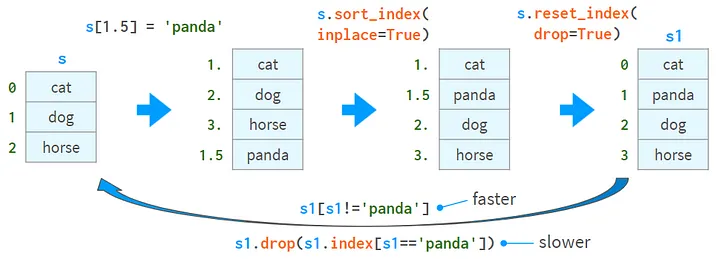

El segundo método para eliminar valores (a través de `drop` ) es más lento y puede provocar
errores complejos en presencia de valores no únicos en el índice.

Los pandas tienen el método `df.insert`, pero solo puede insertar columnas (no filas) en un marco de datos (y no funciona en absoluto con series).

Otro método para agregar e insertar es dividir el DataFrame con `iloc`, aplique las
conversiones necesarias y luego vuelva a colocarlo con `concat` . He implementado
una función llamada `insert` que automatiza el proceso:

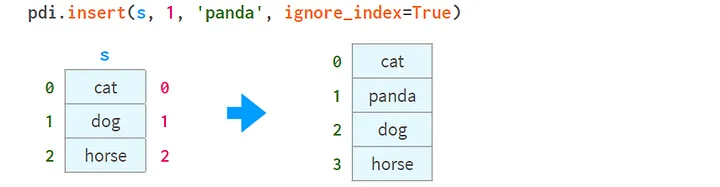

Tenga en cuenta que (al igual que en `df.insert` )el lugar a insertar está dado por una posición `0<=i<=len(s)`, no la etiqueta del elemento del índice.

Puede proporcionar una etiqueta para un nuevo elemento. Para un índice no numérico, es obligatorio.

Por ejemplo:

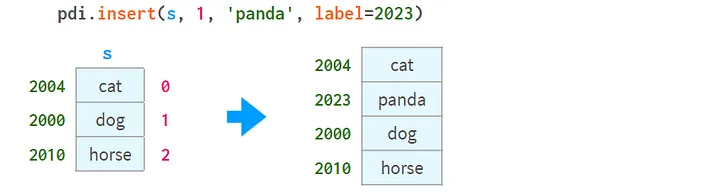

Para especificar el punto de inserción por etiqueta, puede combinar `pdi.find` con `pdi.insert`. 

Como se muestra abajo:

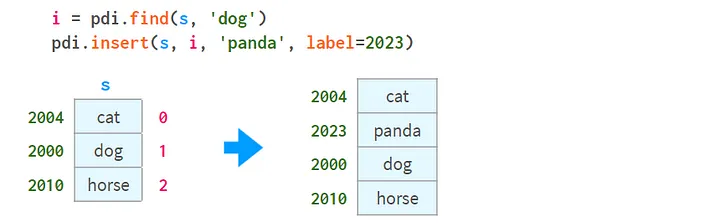

Tenga en cuenta que a diferencia `df.insert`, `pdi.insert` devuelve una copia en lugar de modificar la Serie/Marco de datos en el lugar.

__2.5 Estadísticas__

Pandas proporciona un espectro completo de funciones estadísticas. Pueden brindarle una idea de lo que hay en una serie o un marco de datos de un millón de elementos sin tener que desplazarse manualmente por los datos.

Todas las funciones estadísticas de Pandas ignoran los NaNs, como puede ver a continuación:

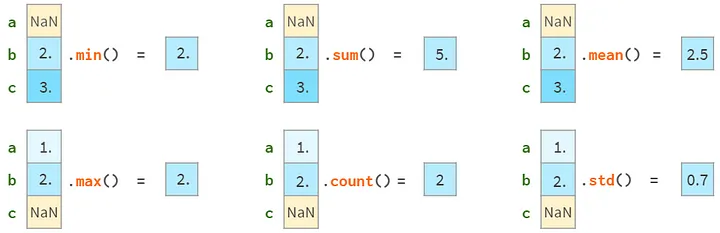

Note que Pandas `std` da un resultado diferente a Numpy `std`.

Dado que se puede acceder a cada elemento de una serie mediante una etiqueta o un índice
posicional, existe una función hermana para `argmin(argmax)` llamado `idxmin(idxmax)`, que se muestra en la imagen:

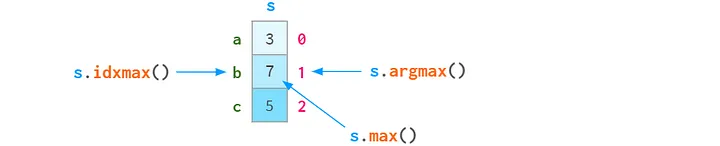

Aquí hay una lista de funciones estadísticas autodescriptivas de Pandas como referencia:

- `std`[https://pandas.pydata.org/docs/reference/api/pandas.core.groupby.DataFrameGroupBy.std.html] , desviación estándar muestral;
- `var`[https://pandas.pydata.org/docs/reference/api/pandas.core.groupby.DataFrameGroupBy.var.html] , varianza imparcial;
- `sem`[https://pandas.pydata.org/docs/reference/api/pandas.core.groupby.DataFrameGroupBy.sem.html] , error estándar no-sesgado de la media;
- `quantile`[https://pandas.pydata.org/docs/reference/api/pandas.core.groupby.DataFrameGroupBy.quantile.html] , cuantil de muestra (`s.quantile(0.5) ≈ s.median()`);
- `mode`[https://pandas.pydata.org/docs/reference/api/pandas.Series.mode.html] , el valor(es) que aparece con más frecuencia;
- `nlargest`[https://pandas.pydata.org/docs/reference/api/pandas.Series.nlargest.html] y `nsmallest`[https://pandas.pydata.org/docs/reference/api/pandas.Series.nsmallest.html] , por defecto, en orden de aparición;
- `diff`[https://pandas.pydata.org/docs/reference/api/pandas.Series.diff.html] , primera diferencia discreta;
- `cumsum`[https://pandas.pydata.org/docs/reference/api/pandas.Series.cumsum.html] y `cumprod`[https://pandas.pydata.org/docs/reference/api/pandas.Series.cumprod.html] , suma acumulada y producto;
- `cummin`[https://pandas.pydata.org/docs/reference/api/pandas.Series.cummin.html] y `cummax`[https://pandas.pydata.org/docs/reference/api/pandas.Series.cummax.html] , mínimo y máximo acumulado.
- `pct_change`[https://pandas.pydata.org/docs/reference/api/pandas.Series.pct_change.html] , cambio porcentual entre el elemento actual y el anterior;
- `skew`[https://pandas.pydata.org/docs/reference/api/pandas.Series.skew.html] , asimetría imparcial (tercer momento);
- `kurt`[https://pandas.pydata.org/docs/reference/api/pandas.Series.kurt.html] o `kurtosis`[https://pandas.pydata.org/docs/reference/api/pandas.Series.kurtosis.html] , curtosis imparcial (cuarto momento);
- `cov`[https://pandas.pydata.org/docs/reference/api/pandas.Series.cov.html], `corr`[https://pandas.pydata.org/docs/reference/api/pandas.Series.corr.html] y `autocorr`[https://pandas.pydata.org/docs/reference/api/pandas.Series.autocorr.html] , covarianza, correlación y autocorrelación;
- `ventanas rodantes`[https://pandas.pydata.org/pandas-docs/stable/reference/window.html#rolling-window-functions], `ponderadas`[https://pandas.pydata.org/pandas-docs/stable/reference/window.html#weighted-window-functions] y `ponderadas exponencialmente`[https://pandas.pydata.org/pandas-docs/stable/reference/window.html#exponentially-weighted-window-functions].

__2.6 Datos duplicados__

Se pone especial cuidado en detectar y tratar datos duplicados, como puedes ver en la
imagen: 

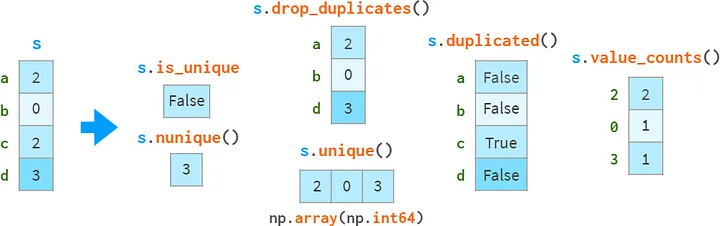

__is_unique, nunique, unique, value_counts__

De hecho, estas dos funciones se complementan entre sí:

`df.drop_duplicates() == df[~df.duplicated()]`

Tenga en cuenta que `s.unique()` es más rápido que `np.unique(O(N) vs O(NlogN))` y conserva el orden en lugar de devolver los resultados ordenados como hace `np.unique`.

Los valores faltantes se tratan como valores normales, lo que en ocasiones puede dar lugar a
resultados sorprendentes.

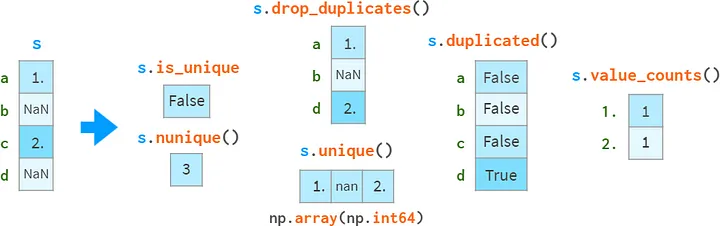

Si desea excluir NaNs, debe hacerlo explícitamente. En este ejemplo particular,

`s.dropna().is_unique == True`.

También existe una familia de propiedades monótonas con nombres que se describen a sí mismos:

- `s.is_monotonic_increasing` [https://pandas.pydata.org/docs/reference/api/pandas.Series.is_monotonic_increasing.html],
- `s.is_monotonic_decreasing` [https://pandas.pydata.org/docs/reference/api/pandas.Series.is_monotonic_decreasing.html] y, de manera bastante inesperada,
- `s.is_monotonic` [https://pandas.pydata.org/pandas-docs/version/1.5/reference/api/pandas.Series.is_monotonic.html], que es sinónimo de `s.is_monotonic_increasing()` y devuelve `False` para series monótonamente decrecientes! (afortunadamente, obsoleto y eliminado en Pandas 2.0)

No existen funciones documentadas que verifiquen la monotonicidad estricta, pero puedes crear una fácilmente combinándolas con `s.unique`, por ejemplo, para comprobar si `s` está aumentando de forma estrictamente monótona escribir `s.unique` y `s.is_monotonic_increasing`.

__2.7 Cadenas y expresiones regulares__

Prácticamente todos los métodos de cadena de Python tienen una versión vectorizada en Pandas:

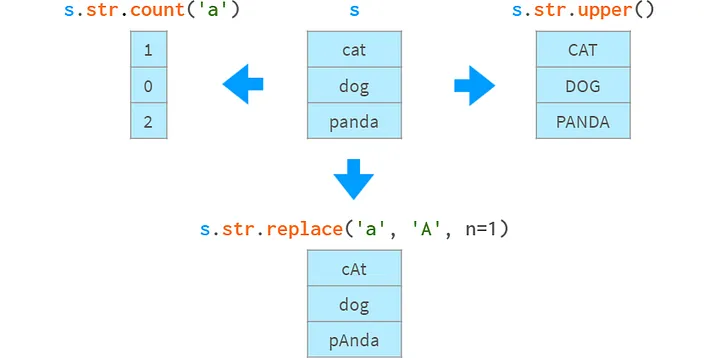

- __count__ [https://pandas.pydata.org/docs/reference/api/pandas.Series.str.count.html], 
- __upper__ [https://pandas.pydata.org/docs/reference/api/pandas.Series.str.upper.html],
- __replace__ [https://pandas.pydata.org/docs/reference/api/pandas.Series.str.replace.html]

Cuando una operación de este tipo devuelve múltiples valores, tiene varias opciones sobre
cómo usarlos:

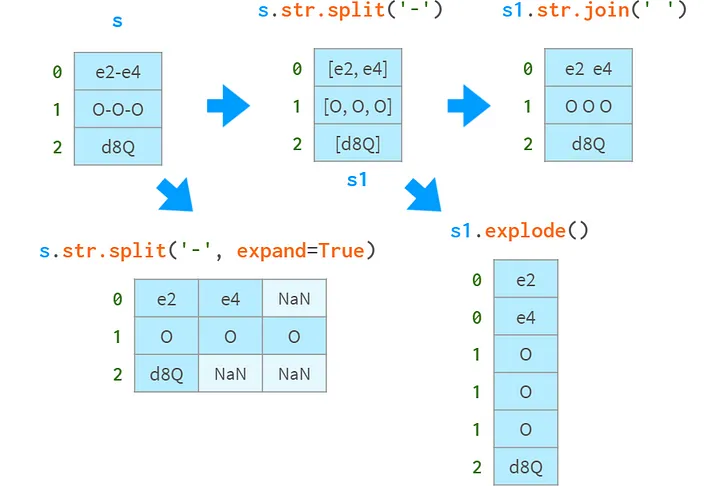

- __split__ [https://pandas.pydata.org/docs/reference/api/pandas.Series.str.split.html]
- __join__ [https://pandas.pydata.org/docs/reference/api/pandas.Series.str.join.html]
- __explode__ [https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.explode.html] 

Si conoce las expresiones regulares, Pandas también tiene versiones vectorizadas de las
operaciones comunes con ellas:

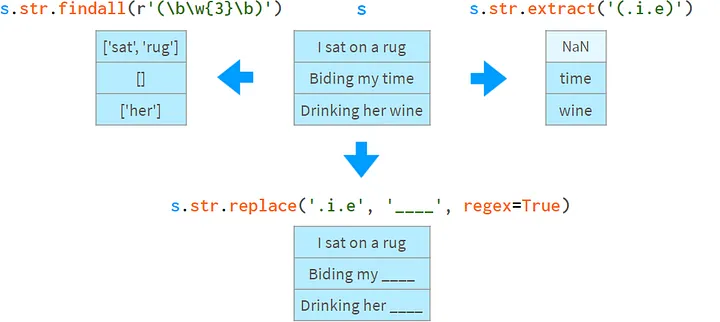

- __findall__ [https://pandas.pydata.org/docs/reference/api/pandas.Series.str.findall.html]
- __extract__ [https://pandas.pydata.org/docs/reference/api/pandas.Series.str.extract.html]
- __replace__ [https://pandas.pydata.org/docs/reference/api/pandas.Series.str.replace.html]

__2.8 Agrupar por__

Una operación común en el procesamiento de datos es calcular algunas estadísticas no sobre todo el conjunto de datos sino sobre ciertos grupos de los mismos. El primer paso es crear un objeto diferido proporcionando criterios para dividir una serie (o un marco de datos) en grupos. Este objeto diferido no tiene una representación significativa, pero puede ser:

- __iterado__ (produce la clave de agrupación y la subserie correspondiente, ideal para
depurar):

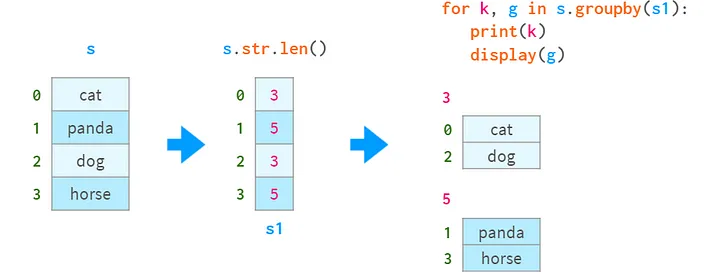

__groupby__ [https://pandas.pydata.org/docs/reference/api/pandas.Series.groupby.html]

- __consultado__ de la misma manera que la Serie ordinaria para obtener una determinada propiedad de cada grupo (es más rápido que la iteración):

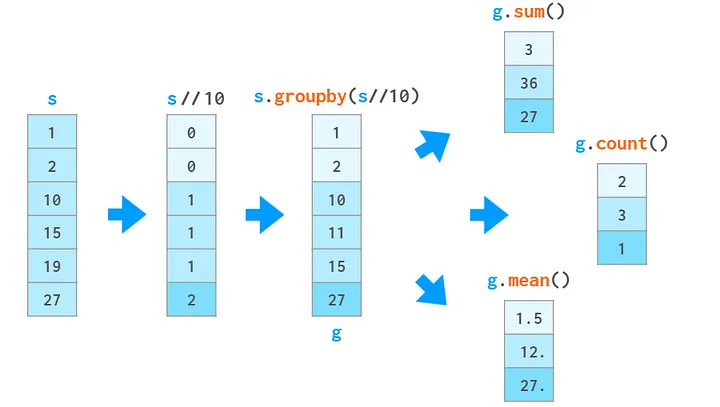

__Todas las operaciones excluyen NaN__

En este ejemplo, dividimos la serie en tres grupos según la parte entera de dividir los
valores entre 10. Para cada grupo, solicitamos la suma de los elementos, el número de
elementos y el valor promedio en cada grupo.

Además de esas funciones agregadas, puede acceder a elementos particulares
según su posición o valor relativo dentro de un grupo. Así es como se ve:

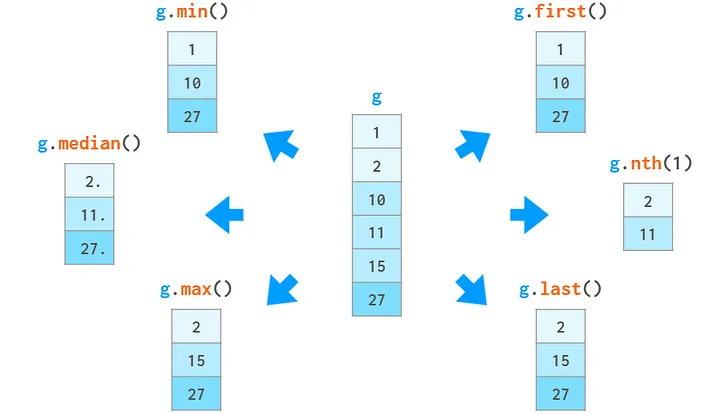

- __min__ [https://pandas.pydata.org/docs/reference/api/pandas.core.groupby.DataFrameGroupBy.min.html]
- __median__ [https://pandas.pydata.org/docs/reference/api/pandas.core.groupby.DataFrameGroupBy.median.html]
- __max__ [https://pandas.pydata.org/docs/reference/api/pandas.core.groupby.DataFrameGroupBy.median.html]
- __first__ [https://pandas.pydata.org/docs/reference/api/pandas.core.groupby.DataFrameGroupBy.first.html]
- __nth__ [https://pandas.pydata.org/docs/reference/api/pandas.core.groupby.DataFrameGroupBy.nth.html]
- __last__ [https://pandas.pydata.org/docs/reference/api/pandas.core.groupby.DataFrameGroupBy.last.html]

También puedes calcular varias funciones en una sola llamada con `g.agg(['min', 'max'])` o
mostrar un montón de funciones estadísticas a la vez con `g.describe()`.
Si esto no es suficiente, también puedes pasar los datos a través de tu propia
función de Python. Puede ser:

- Una función `f` que acepta un grupo `x` (un objeto Serie) y genera un valor
único (p. ej.,`sum()`) con `g.apply(f)`
- Una función `f` que acepta un grupo `x`(un objeto Serie) y genera un objeto Serie
del mismo tamaño que `X`(p.ej, `cumsum())` con `g.transform(f)`

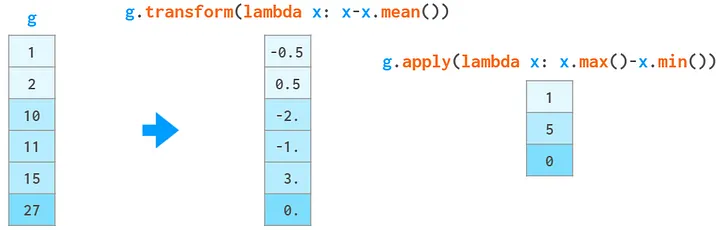

En los ejemplos anteriores, los datos de entrada están ordenados. Esto no es necesario paraagrupar por. En realidad, funciona igualmente bien si los elementos del grupo no se almacenan consecutivamente, por lo que esta mas cerca de `collections.defaultdict` que a `itertools.groupby`. Y siempre devuelve un índice sin duplicados.

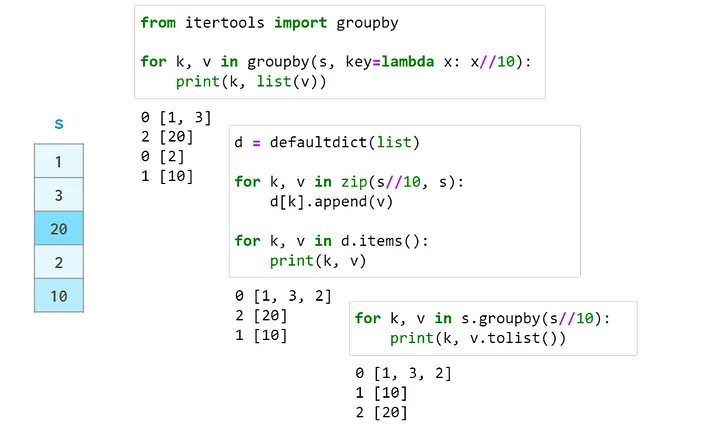

En contraste con `defaultdic` y base de datos relacional cláusula GROUP BY, Pandas
`groupby` ordena los resultados por nombre de grupo. Se puede desactivar `sort=Falso`,
como verás en el código:

In [ ]:
s = pd.Series([1, 3, 20, 2, 10])
for k, v in s.groupby(s//10, sort=False):
    print(k, v.tolist())

# 0 [1, 3, 2]
# 2 [20]
# 1 [10]

__grupoby-sort.py[https://gist.github.com/axil/7519b0b863827a291a704a8e765e2a3e#file-groupby-sort-py]  alojado con ❤ por GitHub[https://github.com/]__

Descargo de responsabilidad: En realidad, `g.apply(f)` es más versátil que el descrito anteriormente:

- `if f(x)` devuelve una serie del mismo tamaño que `x`, puede imitar la transformación
- `if f(x)` devuelve una serie de diferente tamaño o un marco de datos, lo que da como resultado una serie con un índice múltiple correspondiente.

Pero los documentos advierten que esos usos pueden ser más lentos que los correspondientes `transform` y `agg` métodos, así que ten cuidado.

#### Part 3. DataFrames

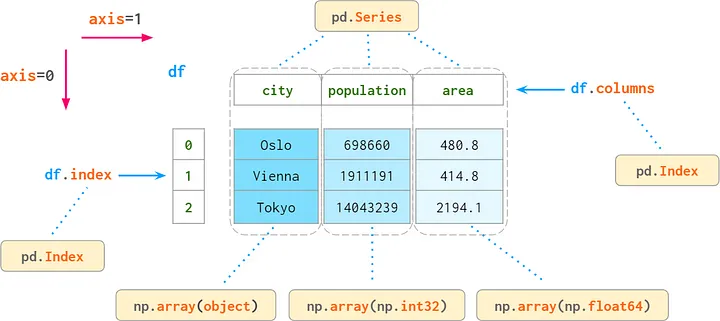

__Anatomía de un DataFrame__

La estructura de datos principal de Pandas es un DataFrame. Incluye una matriz bidimensional con etiquetas para sus filas y columnas. Consta de varios objetos Serie (con un índice compartido), cada uno de los cuales representa una sola columna y posiblemente tenga diferentes tipos.

__3.1 Leer y escribir archivos CSV__

Una forma común de construir un DataFrame es leyendo un archivo CSV (valores separados por
comas), como muestra esta imagen:

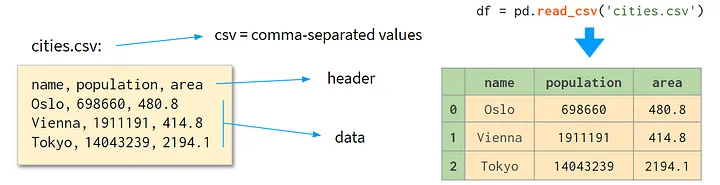

La función `pd.read_csv()` es una herramienta totalmente automatizada e increíblemente personalizable.
Si quieres aprender sólo una cosa sobre Pandas, aprende a usar `read_csv` — valdrá la pena :).

A continuación se muestra un ejemplo de cómo analizar un archivo CSV no estándar:

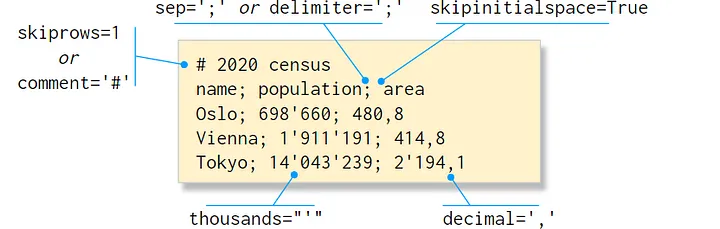

Y una breve descripción de algunos de los argumentos:

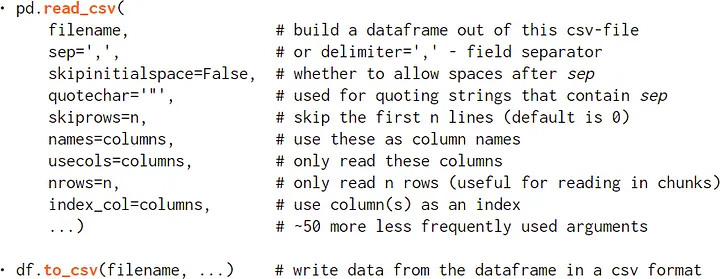

Dado que CSV no tiene una especificación estricta, a veces se necesita un poco de prueba y error para leerlo correctamente. Lo qué tiene de bueno `read_csv` es que detecta automáticamente muchas cosas, incluyendo:

- nombres y tipos de columnas,
- representación de booleanos,
- representación de valores faltantes, etc.

Al igual que con cualquier automatización, será mejor que se asegure de que haya hecho lo correcto. Si los resultados de simplemente escribir `df` en una celda de Jupyter es demasiado larga (o demasiado incompleta), puede intentar lo siguiente:

- `df.head(5)` o `df[:5]` muestra las primeras cinco filas
- `df.dtypes` devuelve los tipos de columnas
- `df.shape` devuelve el número de filas y columnas
- `df.info()` resume toda la información relevante

Es una buena idea establecer una o varias columnas como índice. La siguiente imagen
muestra este proceso:

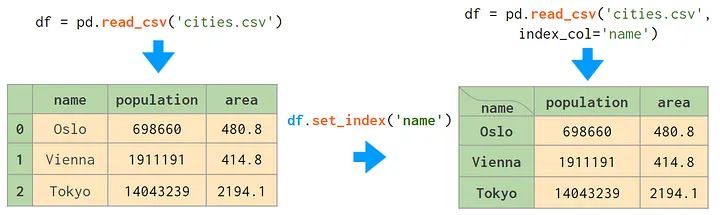

`Index` tiene muchos usos en Pandas:

- agiliza las búsquedas por columna(s) indexada(s);
- las operaciones aritméticas, apilamiento y unión están alineadas por índice; etc.

Todo eso se produce a expensas de un consumo de memoria algo mayor y una sintaxis un
poco menos obvia.

__3.2 Construyendo un marco de datos__

Otra opción es construir un DataFrame a partir de datos ya almacenados en la memoria. Su constructor es tan extraordinariamente omnívoro que puede convertir (¡o envolver!) cualquier tipo de datos que le introduzcas:

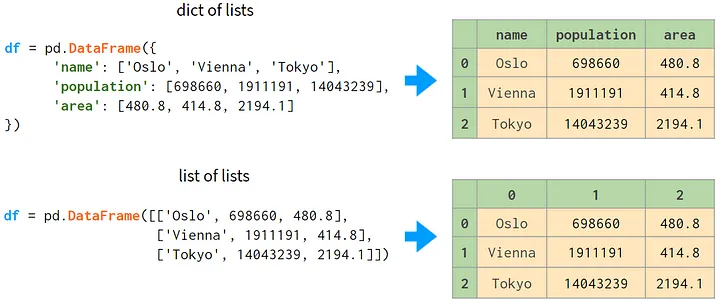

En el primer caso, en ausencia de etiquetas de fila, Pandas etiquetó las filas con números enteros consecutivos. En el segundo caso hizo lo mismo tanto con las filas como con las columnas. Siempre es una buena idea proporcionar a Pandas nombres de columnas en lugar de etiquetas de números enteros (usando las `columnas` como argumento) y, a veces, nombres de filas (usando el `index` como argumento, aunque las `filas` pueden parecer más intuitivas). Esta imagen te ayudará:

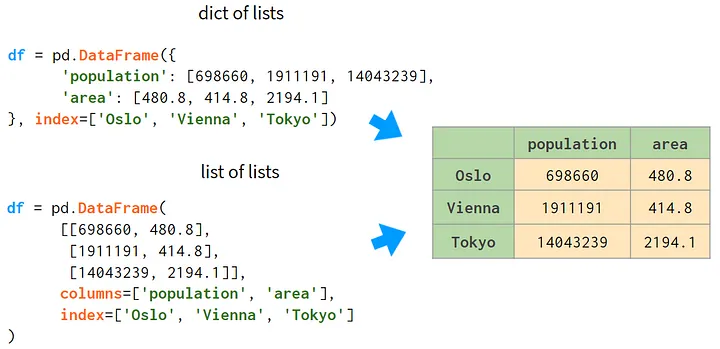

Para asignar un nombre a la columna de índice, escriba `df.index.name = 'city_name'` o usar `pd.DataFrame(..., index=pd.Index(['Oslo', 'Viena', 'Tokio']`, nombre='nombre_ciudad')).

La siguiente opción es construir un DataFrame a partir de un diccionario de vectores NumPy o una matriz NumPy 2D:

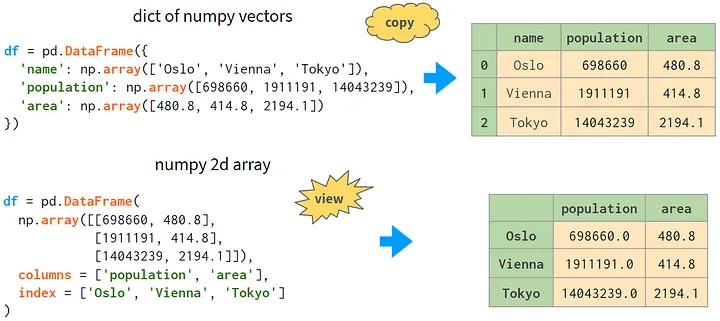

Observe cómo la `population` los valores se convirtieron a flotantes en el segundo caso. En realidad, sucedió antes, durante la construcción de la matriz NumPy. Otra cosa a tener en cuenta aquí es que la construcción de un dataframe a partir de una matriz NumPy 2D es una vista predeterminada. Eso significa que cambiar los valores en la matriz original cambia el dataframe y viceversa.
Además, ahorra memoria.

Este modo también se puede habilitar en el primer caso (un diccionario de vectores NumPy) configurando `copy = False` . Aunque es muy frágil. Operaciones simples pueden convertirlo en una copia sin previo aviso.

Dos opciones más (menos útiles) para crear un DataFrame son:

- de una lista de diccionarios (donde cada dictado representa una sola fila, sus claves son nombres de columnas y sus valores son los valores de celda correspondientes)
- de un diccionario de Serie (donde cada Serie representa una columna; devuelve una copia de forma predeterminada, se le puede indicar que devuelva una vista con `copy = False`).

Si registra la transmisión de datos "sobre la marcha", lo mejor que puede hacer es utilizar un diccionario de listas o una lista de listas porque Python preasigna de forma transparente espacio al final de una lista para que los anexos sean rápidos. Ni las matrices NumPy ni los dataframe Pandas lo hacen. Otra posibilidad (si conoce el número de filas de antemano) es preasignar memoria manualmente con algo como

`DataFrame(np.zeros)` .

__3.3 Operaciones básicas con DataFrames__

Lo mejor de DataFrame (en mi opinión) es que puedes:

- acceder fácilmente a sus columnas, por ejemplo, `df.area` devuelve valores de columna (o alternativamente, `df['area']` — bueno para nombres de columnas que contienen espacios)

- operar las columnas como si fueran variables independientes, por ejemplo, después de `df.population /= 10**6` la población se almacena en millones y el siguiente comando crea una nueva columna llamada 'density' calculada a partir de los valores de las columnas existentes:

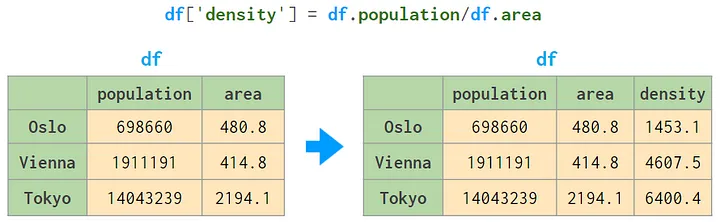

Tenga en cuenta que al crear una nueva columna, los corchetes son obligatorios incluso si su nombre no contiene espacios.

Además, puede utilizar operaciones aritméticas en columnas incluso de diferentes DataFrames
siempre que sus filas tengan etiquetas significativas, como se muestra a continuación:

__3.4 Indexación de DataFrames__

Como ya hemos visto en la sección Serie, los corchetes ordinarios simplemente no son suficientes para satisfacer todas las necesidades de indexación. No puede acceder a filas por etiquetas, no puede acceder a filas separadas por índice posicional y ni siquiera puede hacer referencia a una sola celda, ya que `df['x', 'y']` ¡Está reservado para MultiIndex!

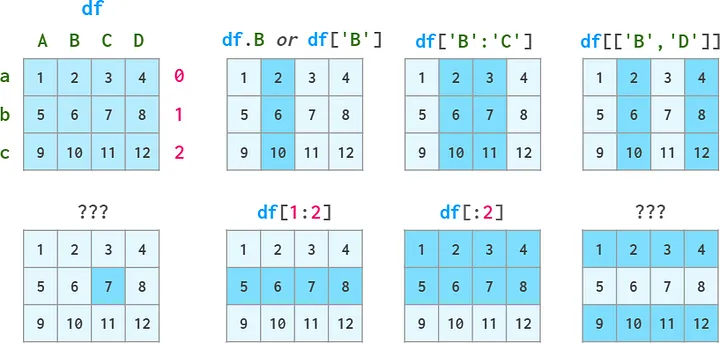

Para satisfacer esas necesidades, los marcos de datos, al igual que las series, tienen dos modos de indexación alternativos: `loc` para indexación por etiquetas y `iloc` para indexación por índice posicional.

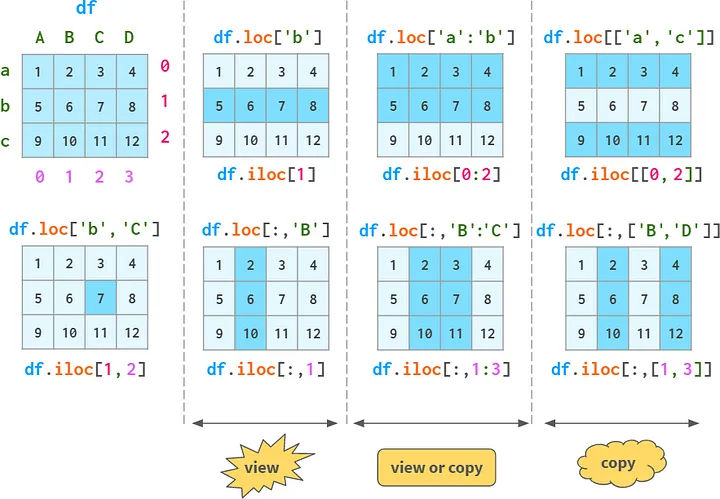

En Pandas, hacer referencia a varias filas/columnas es una copia, no una vista. Pero es un tipo especial de copia que permite realizar tareas en su conjunto:

- `df.loc['a']=10` funciona (se puede escribir en una sola fila como un todo)
- `df.loc['a']['A']=10` funciona (el acceso al elemento se propaga al `df` original)
- `df.loc['a':'b'] = 10` funciona (asignar a un subarreglo como un trabajo completo)
- `df.loc['a':'b']['A'] = 10` no lo hace (la asignación a sus elementos no lo hace).

En el último caso, el valor solo se establecerá en una copia de un segmento y no se
reflejará en el `df` original(Se mostrará una advertencia en consecuencia).

Dependiendo del contexto de la situación, existen diferentes soluciones:

1. Quieres cambiar el `df` dataframe original. Entonces usa 

    - `df.loc['a':'b', 'A'] = 10`

2. Has hecho la copia intencionadamente y quieres trabajar en esa copia:

    - `df1 = df.loc['a':'b']; df1['A']=10 # Advertencia SettingWithCopy`
    
    Para deshacerse de una advertencia en esta situación, conviértala en una copia real:
    - `df1 = df.loc['a':'b'].copiar(); df1['A']=10`
    
Pandas también admite una sintaxis NumPy conveniente para la indexación booleana.

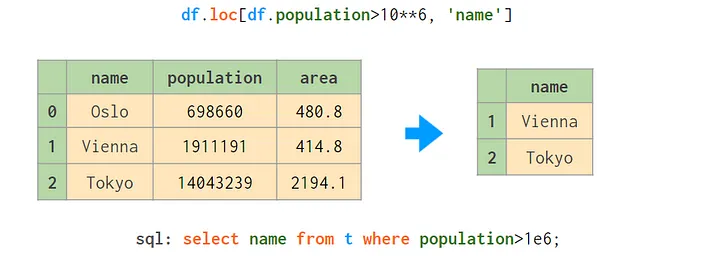

Cuando se utilizan varias condiciones, estas deben estar entre paréntesis, como puedes ver a continuación:

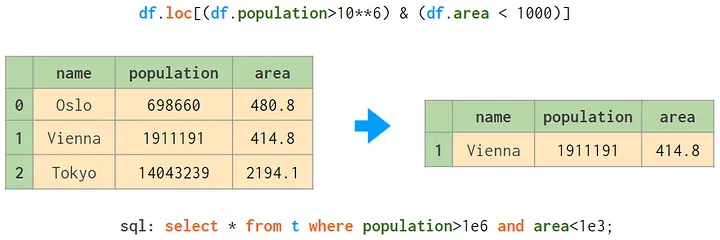

Cuando espera que se devuelva un valor único, necesita cuidado especial.

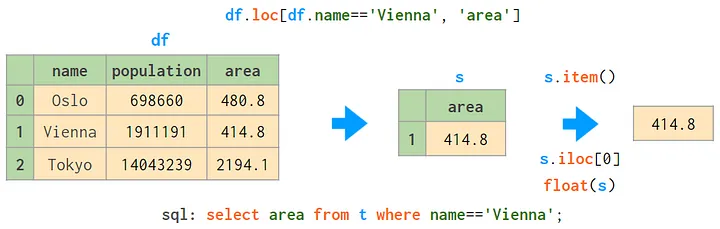

Dado que potencialmente podría haber varias filas que coincidan con la condición,loc
devolvió una serie. Para obtener un valor escalar, puedes usar:

- `float(s)` o uno más universal en el `s.item()` lo cual generará ValueError a menos que
haya exactamente un valor en la Serie

- `s.iloc[0]` eso sólo generará una excepción cuando no se encuentre nada; además, es el
único que admite asignaciones: `df[…].iloc[0] = 100`, pero seguramente no lo necesitas cuando quieres modificar todas las coincidencias: `df[…] = 100` .

Alternativamente, puede utilizar consultas basadas en cadenas:
- `df.query('nombre=="Viena"')`
- `df.query('población>1e6 y área<1000')`

Son más cortos, funcionan muy bien con MultiIndex y los operadores lógicos tienen prioridad
sobre los operadores de comparación (=se requieren menos paréntesis), pero solo pueden
filtrar por filas y no se puede modificar el DataFrame a través de ellos.

Varias bibliotecas de terceros le permiten utilizar la sintaxis SQL para consultar los DataFrames directamente (__duckdb__[https://duckdb.org/] ) o indirectamente copiando el marco de datos a SQLite y envolviendo los resultados nuevamente en objetos Pandas (__pandasql__[https://pypi.org/project/pandasql/] ). Como era de esperar, el método directo es __más rápido__[https://duckdb.org/2021/05/14/sql-on-pandas.html].

__3.5 Aritmética del Dataframe__

Puede aplicar operaciones ordinarias como sumar, restar, multiplicar, dividir, módulo,
potencia, etc., a dataframes, series y combinaciones de los mismos.

Todas las operaciones aritméticas están alineadas con las etiquetas de filas y columnas:

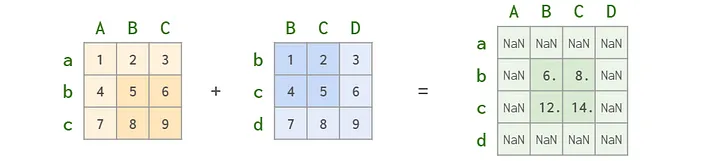

En operaciones mixtas entre DataFrames y Series, la Serie (Dios sabe por qué) se
comporta (y transmite) como un vector de fila y se alinea en consecuencia:

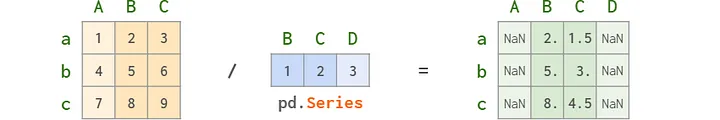

Probablemente para mantenerse en línea con las listas y los vectores 1D NumPy (que no están alineados por etiquetas y se espera que tengan el tamaño como si el DataFrame fuera una simple matriz 2D NumPy):

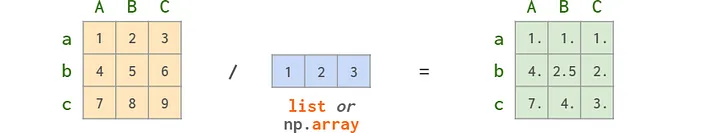

Entonces, en el desafortunado (y, por coincidencia, ¡el más habitual!) caso de dividir un marco de datos por una serie de vectores de columna, debes usar métodos en lugar de operadores, como puedes ver a continuación:

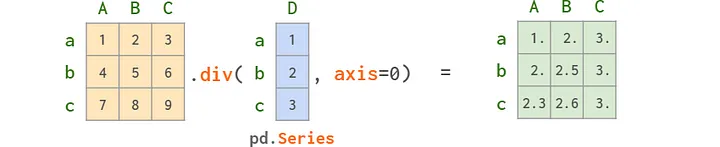

Debido a esta decisión cuestionable, siempre que necesite realizar una operación mixta entre un marco de datos y una serie similar a una columna, debe buscarla en los documentos (o memorizarla):

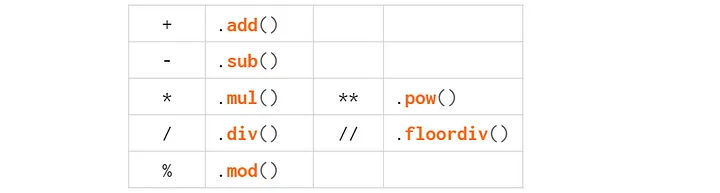

- __add__[https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.add.html]
- __sub__[https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.sub.html]
- __mul__[https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.mul.html]
- __div__[https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.div.html]
- __mod__[https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.mod.html]
- __pow__[https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.pow.html]
- __floordiv__[https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.floordiv.html]

__3.9 Combinando DataFrames__

Pandas tiene bastantes funciones:

- `concat`[https://pandas.pydata.org/docs/reference/api/pandas.concat.html] (concatenación),
- `join`[https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.join.html], `merge`[https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.merge.html] y `merge_asof`[https://pandas.pydata.org/docs/reference/api/pandas.merge_asof.html] (fusiones de estilo de base de datos),
- `combine_first`[https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.combine_first.html], `combine`[https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.combine.html] , y `update`[https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.update.html] (superponiendo un df sobre el otro) que  básicamente hacen lo mismo: combinar información de varios marcos de datos en uno. Pero cada uno de ellos lo hace de manera ligeramente diferente, ya que están diseñados para diferentes casos de uso: